In [9]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.datasets import load_breast_cancer

import matplotlib.pyplot as plt

# Load Breast Cancer dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

In [6]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [2]:
# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [3]:
# Predict and evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9473684210526315

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



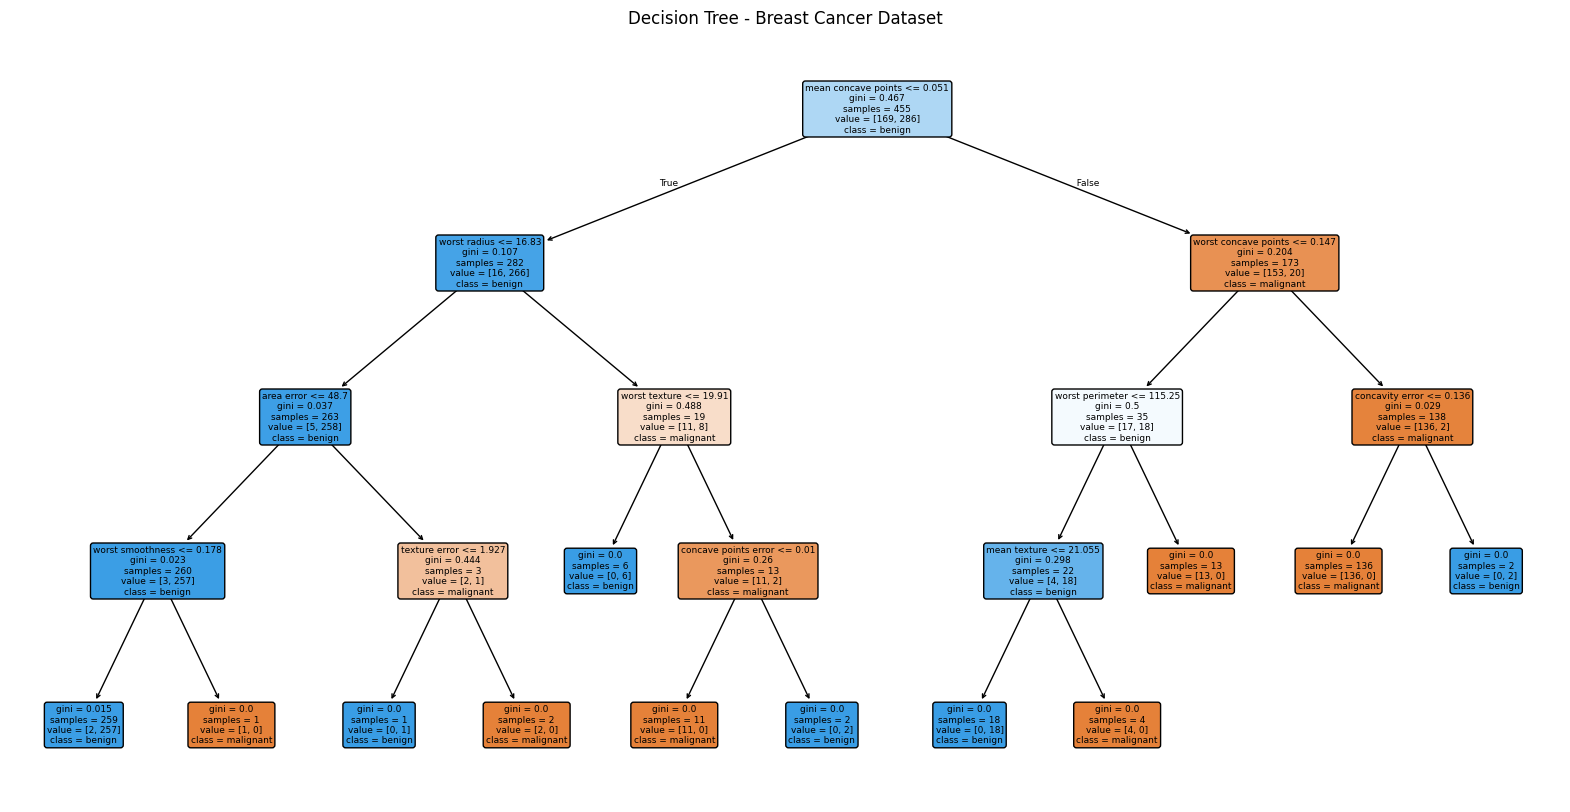

In [4]:
# Visualize the tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=data.target_names, filled=True, rounded=True)
plt.title("Decision Tree - Breast Cancer Dataset")
plt.show()

In [11]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

In [12]:
# Evaluate performance
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Accuracy: 0.9649122807017544


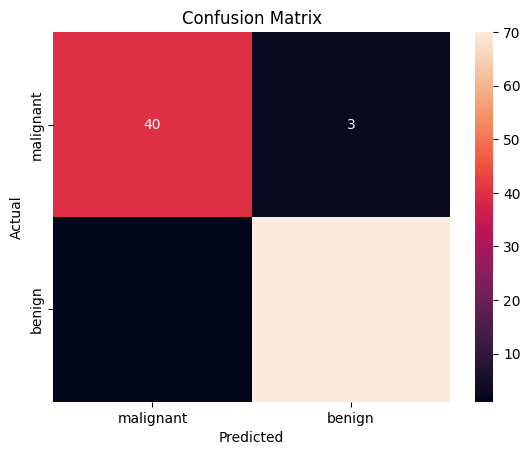

In [14]:
# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d',
            xticklabels=data.target_names, yticklabels=data.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

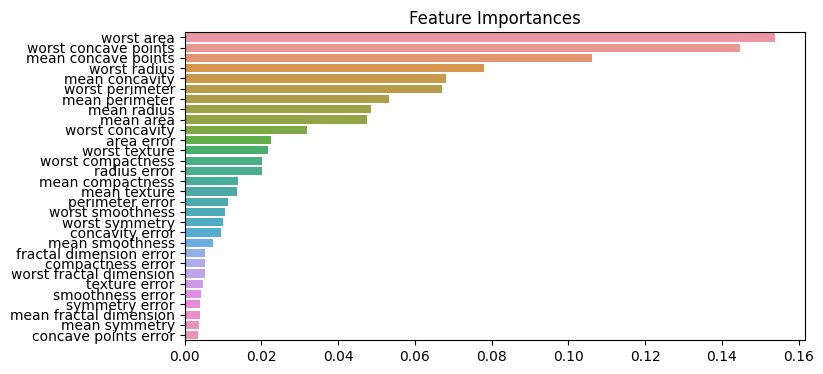

In [18]:
# Feature Importance Visualization
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(8, 4))
plt.title("Feature Importances")
sns.barplot(x=importances[indices], y=np.array(data.feature_names)[indices])
plt.show()

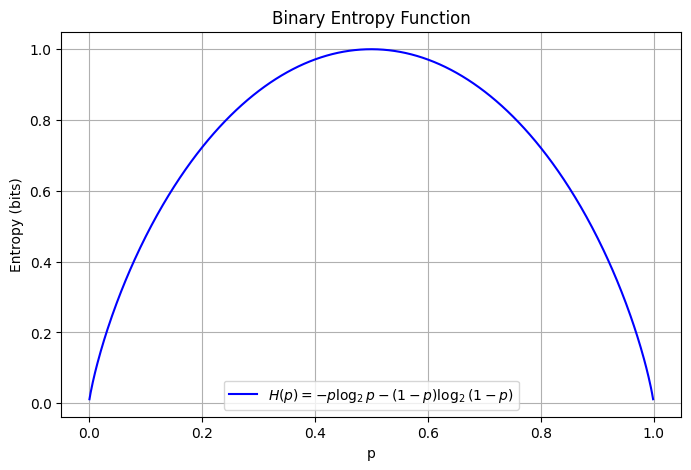

In [19]:
# Binary entropy function
def binary_entropy(p):
    # Use np.where to handle log(0) by setting 0 * log(0) = 0
    return -np.where(p != 0, p * np.log2(p), 0) - np.where(p != 1, (1 - p) * np.log2(1 - p), 0)

# Generate p values from 0 to 1
p_values = np.linspace(0.001, 0.999, 500)
entropy_values = binary_entropy(p_values)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(p_values, entropy_values, label=r'$H(p) = -p \log_2 p - (1-p) \log_2(1-p)$', color='blue')
plt.title("Binary Entropy Function")
plt.xlabel("p")
plt.ylabel("Entropy (bits)")
plt.grid(True)
plt.legend()
plt.show()

In [21]:
from sklearn.ensemble import BaggingClassifier


# Define a base learner
base_model = DecisionTreeClassifier(random_state=42)

# Create the BaggingClassifier
bagging_model = BaggingClassifier(
    estimator=base_model,
    n_estimators=10,           # Number of base learners
    max_samples=0.8,           # Each learner sees 80% of the data
    bootstrap=True,            # Sampling with replacement (bootstrapping)
    random_state=42
)

# Train the Bagging model
bagging_model.fit(X_train, y_train)

,estimator,DecisionTreeC...ndom_state=42)
,n_estimators,10
,max_samples,0.8
,max_features,1.0
,bootstrap,True
,bootstrap_features,False
,oob_score,False
,warm_start,False
,n_jobs,None
,random_state,42
,verbose,0


In [23]:
# Make predictions
y_pred = bagging_model.predict(X_test)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy of Bagging Classifier:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Test Accuracy of Bagging Classifier: 0.956140350877193
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [25]:
# Boosting
from sklearn.ensemble import GradientBoostingClassifier


# Initialize Gradient Boosting Classifier
boosting_model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

# Train the model
boosting_model.fit(X_train, y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [26]:
# Make predictions
y_pred = boosting_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy of Gradient Boosting Classifier:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Test Accuracy of Gradient Boosting Classifier: 0.956140350877193
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        43
           1       0.96      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [27]:
# Stacking

from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


# Base learners
base_learners = [
    ('dt', DecisionTreeClassifier(max_depth=5)),
    ('svc', SVC(probability=True, kernel='linear'))
]

# Meta-learner
meta_learner = LogisticRegression()

# Stacking Classifier
stack_model = StackingClassifier(estimators=base_learners, final_estimator=meta_learner)

In [28]:
# Train
stack_model.fit(X_train, y_train)

# Predict
y_pred = stack_model.predict(X_test)

In [29]:
# Evaluate
print("Stacking Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Stacking Accuracy: 0.9736842105263158
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        43
           1       0.96      1.00      0.98        71

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

